# Value at Risk Assessment Model

### Import Packages


In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Distributions - Set Up Stock Parameters

In [12]:
# Number of shares
shares_TSLA = 1


# Live stock price
price = yf.Ticker('TSLA')
price_TSLA = price.history().tail(1)['Close'].iloc[0]

print(price)
print (price_TSLA)

yfinance.Ticker object <TSLA>
1026.9599609375


30-day Historical volatility source: https://www.alphaquery.com/stock/MSFT/volatility-option-statistics/30-day/historical-volatility

In [13]:
# Investment value
value_TSLA = price_TSLA * shares_TSLA

# Risk free rate (4 week treasury bill rate)
rfr_TSLA = 0.02 

# Volatility (30-day volatility at that time)
vol_TSLA = 0.2116

### Simulations - Calculate Investment Returns

In [14]:
# Number of simulations
simulations = 5000 

# Investment time in a year
t_TSLA = 21/252 

(array([  1.,   0.,   0.,   1.,   3.,   3.,   5.,   1.,   1.,   6.,   5.,
          9.,   8.,   6.,  16.,  15.,  16.,  17.,  22.,  26.,  37.,  21.,
         36.,  50.,  52.,  46.,  61.,  46.,  70.,  72.,  73.,  77.,  75.,
         98.,  93., 110., 100., 111., 126., 120., 155., 164., 128., 136.,
        138., 150., 137., 128., 134., 154., 144., 122., 145., 127., 120.,
        115., 100., 101.,  94.,  81., 101.,  76.,  66.,  69.,  59.,  42.,
         55.,  34.,  35.,  41.,  25.,  24.,  30.,  25.,  16.,  14.,  14.,
         13.,   9.,   8.,   6.,   5.,   3.,   3.,   2.,   2.,   4.,   2.,
          2.,   1.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   1.,   0.,
          2.]),
 array([-3.27185403, -3.20033668, -3.12881932, -3.05730197, -2.98578462,
        -2.91426727, -2.84274991, -2.77123256, -2.69971521, -2.62819785,
        -2.5566805 , -2.48516315, -2.41364579, -2.34212844, -2.27061109,
        -2.19909373, -2.12757638, -2.05605903, -1.98454167, -1.91302432,
        -1.84150697, -1.76

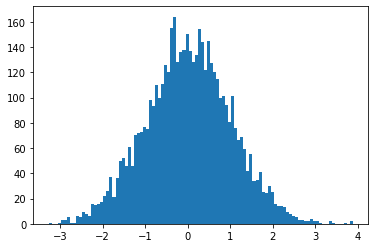

In [8]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample,bins=100)

In [15]:
print(np.mean(sample))
print(np.std(sample))

0.01650882194021989
0.9998954543042429


In [10]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - .5 * vol ** 2) * t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function to simulate the returns
returns_TSLA = VaR(value_TSLA, rfr_TSLA, vol_TSLA, t_TSLA, simulations)

### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [16]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.

x = 0.9
y = 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x, y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-78,163
VaR at 95% confidence level: $-99,756
VaR at 99% confidence level: $-136,910


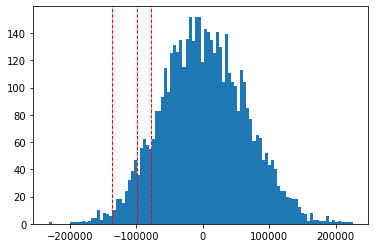

In [17]:
# Plot the returns
plt.hist(returns_TSLA, bins=100);

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_TSLA, i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)

## The end 
